<a href="https://colab.research.google.com/github/A01734921/Clase-Visualizaci-n-de-Datos/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripción de los pilotos de Formula 1 en la temporada 2022

Quiero que tomes el rol de un programador de python experto en visualización de datos, y en base a las siguiente base de datos responder a las siguientes preguntas con un código y su argumentación: https://raw.githubusercontent.com/toUpperCase78/formula1-datasets/master/Formula1_2022season_drivers.csv

Esta base de datos nos muestra los corredores que hubo en la temporada 2022, nos muestra lo que han logrado a lo largo de su carrera como pilotos, los puntos, carreras ganadas, posiciones en pole y campeonatos del mundo.


In [ ]:
url= 'https://raw.githubusercontent.com/toUpperCase78/formula1-datasets/master/Formula1_2022season_drivers.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(url)

Variables:


1.   Driver: Es una variable categorica y nos muestra el nombre de los pilotos.
2.   Abbreviation: Es una variable categorica y nos muestra la abreviación con la que se le conoce al piloto.
3. No: Es una variable categorica y nos muestra el numero que usan los pilotos para correr.
4. Team: Es una variable categorifca y nos muestra el equipo al que pertenecen los pilotos.
5. Country: Es una variable categorica y representa el país al que pertenecen.
6. Poidums: Es una variable numerica y nos muestra los podios que llevan a lo largo de su carrera.
7. Points: Es una variable numerica y nos muestra los puntos que han logrado a lo largo de su carrera.
8. Grand Prix Entered: Esta variable numerica nos muestra el numero de Grandes Premios que han corrido a lo largo de su carrera como pilotos.
9. World Championships: Esta variable es numerica y nos muestra los campeonatos del mundo que llevan acumulados.
10. Highest Race Finish: Esta variables es categorica y nos muestra la posición mas alta que han logrado y las veces que lo han logrado.
11. Highest Grid Position: 



**¿Qué pilotos son los que tienen mas puntos acumulados en su carrera?**

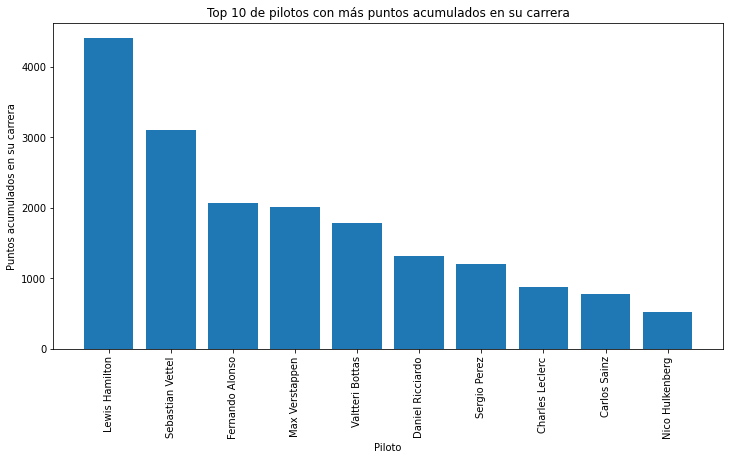

In [ ]:
career_points = df.groupby(['Driver'])['Points'].sum().reset_index()
career_points = career_points.sort_values('Points', ascending=False)
top10_career_points = career_points.head(10)
plt.figure(figsize=(12, 6))
plt.bar(x=top10_career_points['Driver'], height=top10_career_points['Points'])
plt.xticks(rotation=90)
plt.xlabel('Piloto')
plt.ylabel('Puntos acumulados en su carrera')
plt.title('Top 10 de pilotos con más puntos acumulados en su carrera')
plt.show()


En este gráfico, podemos ver que Lewis Hamilton del Reino Unido tiene el mayor número de puntos acumulados en su carrera con más de 4000 puntos. También podemos ver que los siguientes pilotos con el mayor número de puntos acumulados son Sebastian Vettel de Alemania, Fernando Alonso de España, y Max Vestappen de Holanda.

**¿Que pilotos han sido campeones del mundo y cuantas veces?**

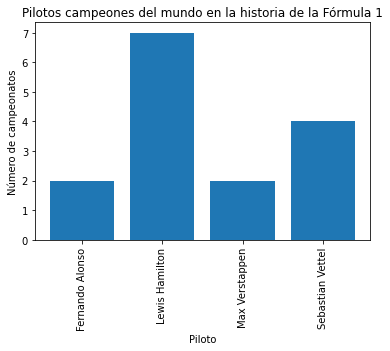

In [ ]:
champions = df.groupby('Driver')['World Championships'].sum().reset_index()
champions = champions[champions['World Championships'] > 0]
plt.xticks(rotation=90)
plt.bar(champions['Driver'], champions['World Championships'])
plt.xlabel('Piloto')
plt.ylabel('Número de campeonatos')
plt.title('Pilotos campeones del mundo en la historia de la Fórmula 1')

plt.show()


En este gráfico, podemos ver los pilotos que han sido campeones del mundo en la historia de la Fórmula 1 y cuántas veces lo han sido. Podemos ver que  Lewis Hamilton es el pilotos que ha ganado más campeonatos, con 7 cada uno. Detrás de ellos, Sebastian Vettel con 4 y Fernando Alonso y Max Verstappen con 2.

**¿Cuáles son los pilotos con más podios?**

In [ ]:
podiums = df.groupby('Driver')['Podiums'].sum().reset_index()
top10 = podiums.sort_values('Podiums', ascending=False).head(10)
print(top10)

              Driver  Podiums
11    Lewis Hamilton      191
18  Sebastian Vettel      122
5    Fernando Alonso       98
12    Max Verstappen       77
20   Valtteri Bottas       67
3   Daniel Ricciardo       32
19      Sergio Perez       26
2    Charles Leclerc       24
1       Carlos Sainz       15
6     George Russell        9


En este gráfico podemos observar los pilotos enlistados de mayor a menor en cuanto a más podios obtenidos en su carrera, en la columna del lado izquierdo se observa el nombre del piloto y del lado derecho el número de podios.

****¿Cuál es el porcentaje de los 10 pilotos que mas Grandes Premios han participado?****


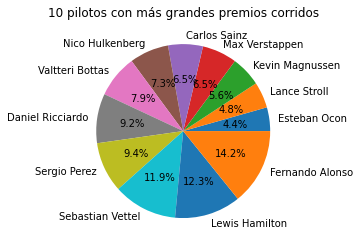

In [ ]:

gp_count = df.groupby('Driver').sum()['Grands Prix Entered']
top_10_drivers = gp_count.sort_values()[10:]
plt.pie(top_10_drivers, labels=top_10_drivers.index, autopct='%1.1f%%')
plt.title('10 pilotos con más grandes premios corridos')
plt.show()


**¿Qué pilotos son los que menos puntos tienen?**

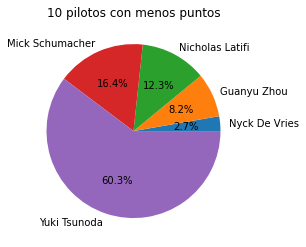

In [ ]:
points_by_driver = df.groupby('Driver').sum()['Points']

bottom_10_drivers = points_by_driver.sort_values()[:5]

plt.pie(bottom_10_drivers, labels=bottom_10_drivers.index, autopct='%1.1f%%')
plt.title('10 pilotos con menos puntos')
plt.show()

**¿Que pilotos han logrado tener pole position?**

In [ ]:
pole_position_pilots = df.loc[df['Highest Grid Position'] == 1, 'Driver'];
print(pole_position_pilots);

0       Max Verstappen
1      Charles Leclerc
2         Sergio Perez
3       George Russell
4         Carlos Sainz
5       Lewis Hamilton
6         Lando Norris
8      Fernando Alonso
9      Valtteri Bottas
10    Daniel Ricciardo
11    Sebastian Vettel
14        Lance Stroll
21     Nico Hulkenberg
Name: Driver, dtype: object


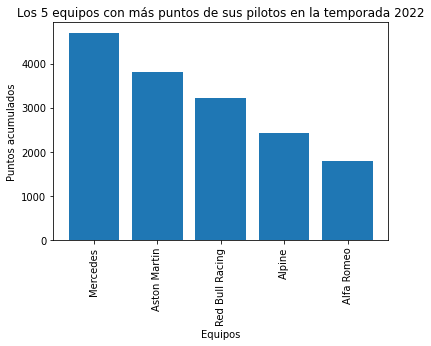

In [ ]:
df_drivers = pd.read_csv(url)
team_points = df_drivers.groupby('Team')['Points'].sum()
top_teams = team_points.sort_values(ascending=False).head(5)
fig, ax = plt.subplots()
ax.bar(top_teams.index, top_teams.values)
plt.xticks(rotation=90)
ax.set_title('Los 5 equipos con más puntos de sus pilotos en la temporada 2022')
ax.set_xlabel('Equipos')
ax.set_ylabel('Puntos acumulados')

plt.show()